# Projet python 2A : évaluation de la valeure des footballeurs

César Fabiani - Mathis Lecoq

_Ce projet est réalisé dans le cadre du cours de Python de Lino Galiana pour l'année 2023-2024._

### Introduction

**Notre objectif** : Evaluer la valeur d'un joueur. Pour cela nous avons utilisé les données sur le site [**FB**REF](https://fbref.com/fr/) qui contiennent des données détaillés (buts, passes, etc) pour chaque joueur dans chaque match.

**Le projet** : Notre projet se décompose en N étapes : 
1. Extraction des données en scrappant le site [**FB**REF](https://fbref.com/fr/)
2. Identification des variables d'intérets
3. ...

### Structure du répertoire

À la racine du répertoire, on trouve :
- **`README.md`** : présentation détaillée du projet

### Installations et importations

La partie scrapping prenant beaucoup de temps pour éviter de se faire bloquer par le site, elle n'est pas incluse dans ce notebook. Vous pouvez la trouver dans le fichier **`scrapping`**.
Pour information, les installations et importations sont les suivantes :

In [118]:
!sudo apt-get install python3-pip python-dev
!pip install lxml

import bs4
import lxml
import urllib
import requests

from bs4 import BeautifulSoup
from urllib import request

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python3-pip
E: Unable to locate package python-dev


De plus, on utilise le module **`time`** pour espacer les requêtes et le module **`json`** pour stocker les données recueillies : 

In [119]:
import json
import time

Pour traiter les données, nous avons utilisé le module **`pandas`** :

In [120]:
import pandas as pd

### Étape 1 : Extraction des données en scrappant le site [**FB**REF](https://fbref.com/fr/)

_Le code de la partie scraping ne se trouve pas dans le notebook car prennant trop de temps pour s'éxecuter. Vous pouvez le trouvez dans le dossier **`scraping`**.

La partie scraping s'est déroulée en deux étapes. Premièrement le programme **`scraping_FBREF_1`** permet pour une ligue donnée et une saison donnée d'avoir l'ensemble des url des rapports de match correspondant à cette ligue et à cette saison. La liste des url des matchs est exportée vers le fichier json **`liste_url.json`**. Ensuite, les url récoltées sont utilisées par le programme **`scrap_ligue`** qui vient scrapper les tableaux rassemblant les données de chaque joueur. Ainsi une ligne de ce tableau correspond à la performence d'un joueur lors d'un match. Puis les données sont exportées vers le fichier **`statistiques`**. Voici pour exemple les premières lignes du fichier : 

In [121]:
path = "data/data_premierleague_2022_2023_V1.csv"
df = pd.read_csv(path)
print(df.head())

   Unnamed: 0                Joueur  Numéro de maillot   Nation Emplacement  \
0           0       Odsonne Édouard                 22   fr FRA          FW   
1           1  Jean-Philippe Mateta                 14   fr FRA          FW   
2           2         Wilfried Zaha                 11   ci CIV          LW   
3           3           Jordan Ayew                  9   gh GHA       RW,AM   
4           4          Eberechi Eze                 10  eng ENG          AM   

      Âge  Minutes  Buts  Passes décisives_x  Pénaltys marqués  ...  \
0  24-201       57     0                   0                 0  ...   
1  25-038       33     0                   0                 0  ...   
2  29-268       90     0                   0                 0  ...   
3  30-328       90     0                   0                 0  ...   
4  24-037       85     0                   0                 0  ...   

   Centres_y  Interceptions  Tacles réussis_y  Pénaltys réussis  \
0          0              0    

Une fois la base de données obtenue, nous avons nettoyé la base afin d'obtenir des données sur lesquelles nous pouvons travailler. 

### Étape 2 : Scrapping du site Transfermarkt

### Étape 3 : Nettoyage des données et fusion des deux bases

Ici il faut mettre ce qui est dans le cleaning pour clean la base FBref (notamment clarifier les positions, c'est le plus important car le modèle est bancal à cause de ça pour l'instant)+ il faut clean la base transfermarkt (transformer les valeurs qui sont en string en valeur numérique avec 30 mil qui devient 30 et 500k qui devient 0.5).

En suite on peut merge les deux bases en faisant un left join . Le code de ça est pour l'instant dans la partie modèle et est un peu brouillon je le 

Une fois ça fait ça nous crée notre base de travail. Je sais pas si on l'exporte ou non. En soit on peut la conserver dans le code pour la suite ou la save et la réouvrir ensuite

En attendant, comme j'en ai besoin je créé les nouvelles positions, mais tu peux remplacer par ce que tu as fais, c'est juste temporaire mon truc. D'ailleurs ici je recupère data_pl qui une base déjà issue du fichier cleaning

In [170]:
data_pl = pd.read_csv("/home/onyxia/work/evaluation_football/data/df_PL.csv")

def position(row):
    if len(row['Emplacement']) > 2:
        return row['Emplacement'][:2]
    else:
        return row['Emplacement']

data_pl['position'] = data_pl.apply(position, axis=1)

def position_aggregated(row):
    if row['position'] in ['LW','RW','FW']:
        return 'Attaquant'
    elif row['position'] in ['CM','RM','DM','LM','AM']:
        return 'Milieu'
    elif row['position'] in ['GK']:
        return 'Gardien'
    else : 
        return 'Defenseur'

data_pl['position_aggregated'] = data_pl.apply(position_aggregated, axis=1)   
print(data_pl['Emplacement'])
print(data_pl['position_aggregated'])

0           FW
1           FW
2           LW
3        RW,AM
4           AM
         ...  
11340       LB
11341       CB
11342       CB
11343       RB
11344       GK
Name: Emplacement, Length: 11345, dtype: object
0        Attaquant
1        Attaquant
2        Attaquant
3        Attaquant
4           Milieu
           ...    
11340    Defenseur
11341    Defenseur
11342    Defenseur
11343    Defenseur
11344      Gardien
Name: position_aggregated, Length: 11345, dtype: object


### Étape 4 : Statistiques descriptives

### Étape 5 : Modèle

Je mets le modèle temporaire en chargeant des bases.
Comme le merge des deux bases n'est pas encore fait, je le fait là mais infine faudra le placer plus haut

Ci-dessous merge temporaire qui sera replacer au dessus

In [171]:

right = pd.read_csv("/home/onyxia/work/evaluation_football/data/tm.csv")
data_pl.set_index('Joueur', inplace= True)
right.columns = ['Joueur', 'Valeur', 'Date naissance']
right.set_index('Joueur', inplace= True)

base_work = pd.merge(data_pl, right, how='left', left_index=True, right_index=True)
base_work = base_work.sort_values(by = "Unnamed: 0.1")
base_work['Joueur'] = base_work.index
base_work = base_work.reset_index(drop = True)
col_joueur = base_work.pop('Joueur')
base_work.insert(0, 'Joueur', col_joueur)
print(base_work)
print(base_work['Valeur'].isna().sum())

                     Joueur  Unnamed: 0.1  Unnamed: 0  Numéro de maillot  \
0           Odsonne Édouard             0           0                 22   
1      Jean-Philippe Mateta             1           1                 14   
2             Wilfried Zaha             2           2                 11   
3               Jordan Ayew             3           3                  9   
4              Eberechi Eze             4           4                 10   
...                     ...           ...         ...                ...   
11835            Nathan Aké         11340          23                  6   
11836          Shea Charles         11341          24                 62   
11837       Aymeric Laporte         11342          25                 14   
11838           Kyle Walker         11343          26                  2   
11839               Ederson         11344          27                 31   

        Nation Emplacement     Âge  Minutes  Buts  Passes décisives_x  ...  \
0       f

In [172]:

print(base_work['Valeur'])

base_work = base_work.dropna(subset=['Valeur'])

print(base_work['Valeur'])


0                 NaN
1         7,00 mio. €
2        22,00 mio. €
3         5,00 mio. €
4        40,00 mio. €
             ...     
11835    42,00 mio. €
11836               -
11837    25,00 mio. €
11838    13,00 mio. €
11839    40,00 mio. €
Name: Valeur, Length: 11840, dtype: object
1         7,00 mio. €
2        22,00 mio. €
3         5,00 mio. €
4        40,00 mio. €
5         3,00 mio. €
             ...     
11835    42,00 mio. €
11836               -
11837    25,00 mio. €
11838    13,00 mio. €
11839    40,00 mio. €
Name: Valeur, Length: 10905, dtype: object


In [173]:
def valeur_joueur(row):
    if 'mio. €' in row['Valeur']:
        return float(row['Valeur'].replace(" mio. €", '').replace(',', '.'))
    elif 'K €' in row['Valeur']:
        return float(row['Valeur'][:-4]) / 1000
    else: 
        return 0

base_work['valeur_joueur'] = base_work.apply(valeur_joueur, axis = 1)


In [174]:
print(base_work['Valeur'][100:110])
print(base_work['valeur_joueur'][100:110])

113     8,00 mio. €
114         600 K €
115     8,00 mio. €
116    16,00 mio. €
117     3,50 mio. €
118    20,00 mio. €
119    10,00 mio. €
121         600 K €
122    12,00 mio. €
123    18,00 mio. €
Name: Valeur, dtype: object
113     8.0
114     0.6
115     8.0
116    16.0
117     3.5
118    20.0
119    10.0
121     0.6
122    12.0
123    18.0
Name: valeur_joueur, dtype: float64


In [175]:
def buts_equipe(row):
    if row["id_team_A"] == row["team tag"]:
        return row['score_team_A']
    else:
        return row['score_team_B']

base_work['buts_equipes'] = base_work.apply(buts_equipe, axis=1)

data_pl_2 = base_work[base_work['position_aggregated']== 'Attaquant']

In [176]:
y = base_work['buts_equipes'].values.reshape(-1,1)

def reg_simple(x,y):
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    y_pred = reg.predict(x)

    intercept = reg.intercept_
    slope = reg.coef_[0]
    mse = mean_squared_error(y,y_pred)
    r2 = r2_score(y,y_pred)
    
    return intercept, slope, mse, r2

In [177]:
Var_forward = ['Buts', 'Passes décisives_x','Pénaltys marqués', 'Pénaltys tirés', 'Total des tirs ',
       'Shots on Target', 'Cartons jaunes_x', 'Cartons rouges_x', 'Touches_x',
       'Tacles_x', 'Interceptions_x', 'Balles contrées_x','Actions menant à un tir',
       'Actions menant à un but', 'Passes réussies_x', 'Passes tentées_x',
       'Passes progressives_x', 'Balle au pied_x','Possessions progressives_x', 'Dribbles tentés_x', 'Dribbles réussis_x'
       ]

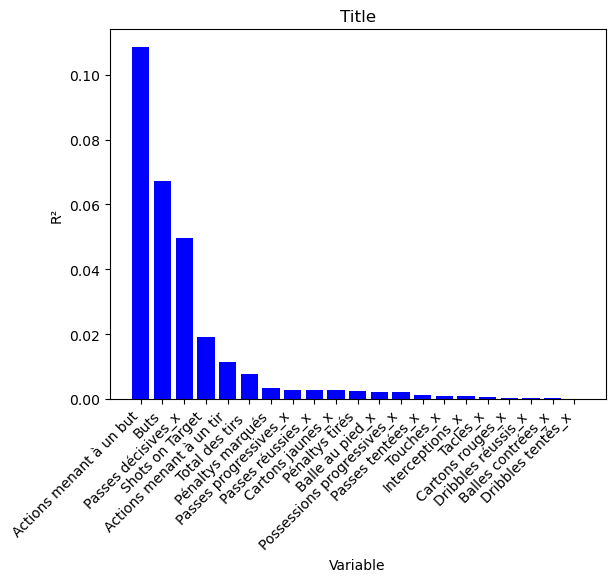

In [178]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

stat_forward = Var_forward
dict_forward = {}
for stat in stat_forward:
    x = base_work[[stat]]
    result_reg = reg_simple(x,y)
    #print(result_reg)
    dict_forward[stat] = result_reg




import matplotlib.pyplot as plt

var = dict_forward.keys()
r2list = [ele[3] for ele in dict_forward.values()]

sorted_data = sorted(zip(var, r2list), key=lambda x: x[1], reverse=True)
var_sorted, r2list_sorted = zip(*sorted_data)

plt.bar(var_sorted, r2list_sorted, color='blue')
plt.xlabel('Variable')
plt.ylabel('R²')
plt.title('Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [179]:
var_retenues = ['Buts','Passes décisives_x','Shots on Target','Total des tirs ','Passes progressives_x']
x = data_pl_2[var_retenues]
y = data_pl_2['buts_equipes'].values.reshape(-1,1)
print(reg_simple(x,y))
intercept, coef, _ , _ = reg_simple(x,y)
list_coef = list(coef)

(array([1.20124946]), array([ 1.12359173,  1.10840136,  0.03871762, -0.06646548,  0.00821231]), 1.4201955916323605, 0.22734329723999902)


In [206]:
data_pl_2['pts joueurs'] =  data_pl_2[var_retenues[0]] * list_coef[0] + \
                                        data_pl_2[var_retenues[1]] * list_coef[1] + \
                                        data_pl_2[var_retenues[2]] * list_coef[2] + \
                                        data_pl_2[var_retenues[3]] * list_coef[3] + \
                                        data_pl_2[var_retenues[4]] * list_coef[4] 

perf_joueur = data_pl_2.groupby('Joueur').agg({'Buts' : 'sum','Minutes' : 'sum', 'pts joueurs': 'sum', 'pts_gagnes': 'sum', 'valeur_joueur' : 'first'}).reset_index()
perf_joueur = perf_joueur[perf_joueur['Minutes'] >= 900]
perf_joueur['pts joueur par 90'] = perf_joueur['pts joueurs'] * 90 / perf_joueur['Minutes']



/tmp/ipykernel_10616/170549859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pl_2['pts joueurs'] =  data_pl_2[var_retenues[0]] * list_coef[0] + \


Ici commence un test

In [196]:
perf_joueur_test = data_pl_2.groupby('Joueur').agg({'Buts' : 'sum',
                                    'Passes décisives_x' : 'sum', 'Shots on Target' : 'sum',
                                    'Total des tirs ' : 'sum', 'Passes progressives_x' : 'sum','Minutes' : 'sum', 'pts joueurs': 'sum', 'pts_gagnes': 'sum', 'valeur_joueur' : 'first'}).reset_index()
print(perf_joueur_test)

                 Joueur  Buts  Passes décisives_x  Shots on Target  \
0    Abdoulaye Doucouré     0                   0                0   
1        Adam Armstrong     2                   1               11   
2          Adam Lallana     0                   0                0   
3          Adama Traoré     2                   0                5   
4    Alejandro Garnacho     3                   2                9   
..                  ...   ...                 ...              ...   
234       Wilfried Zaha     6                   2               19   
235         Will Hughes     0                   0                0   
236             Willian     5                   5               17   
237       Wout Weghorst     0                   1                4   
238         Yoane Wissa     7                   3               14   

     Total des tirs   Passes progressives_x  Minutes  pts joueurs  pts_gagnes  \
0                  0                      0        1     1.201249           3 

In [208]:
perf_joueur_test['pts joueurs'] =  perf_joueur_test[var_retenues[0]] * list_coef[0] + \
                                        perf_joueur_test[var_retenues[1]] * list_coef[1] + \
                                        perf_joueur_test[var_retenues[2]] * list_coef[2] + \
                                        perf_joueur_test[var_retenues[3]] * list_coef[3] + \
                                        perf_joueur_test[var_retenues[4]] * list_coef[4] 
perf_joueur_test = perf_joueur_test[perf_joueur_test['Minutes'] >= 900]
print(perf_joueur_test[['Joueur','pts joueurs']].sort_values(by = 'pts joueurs', ascending = False))
perf_joueur_test['pts joueur par 90'] = perf_joueur_test['pts joueurs'] * 90 / perf_joueur_test['Minutes']

                    Joueur  pts joueurs
76          Erling Haaland    44.134865
91              Harry Kane    32.360204
174          Mohamed Salah    29.861172
144       Leandro Trossard    27.158641
30             Bukayo Saka    24.224621
..                     ...          ...
64   Dominic Calvert-Lewin     1.833264
3             Adama Traoré     1.748412
163          Matheus Cunha     0.971542
60             Diego Costa    -0.060887
179            Neal Maupay    -0.819278

[74 rows x 2 columns]


Ici finit un test

                    Joueur  Buts  Minutes  pts joueurs  pts_gagnes  \
76          Erling Haaland    36     2769    44.134865          83   
91              Harry Kane    30     3405    32.360204          60   
174          Mohamed Salah    19     3200    29.861172          64   
144       Leandro Trossard     4     2738    27.158641          96   
30             Bukayo Saka    14     3181    24.224621          84   
..                     ...   ...      ...          ...         ...   
64   Dominic Calvert-Lewin     2     1165     1.833264          14   
3             Adama Traoré     2     1185     1.748412          27   
163          Matheus Cunha     2      938     0.971542          24   
60             Diego Costa     1     1220    -0.060887          28   
179            Neal Maupay     2     2200    -0.819278          54   

     valeur_joueur  pts joueur par 90  
76           180.0           1.434503  
91            90.0           0.855336  
174           65.0           0.839845  

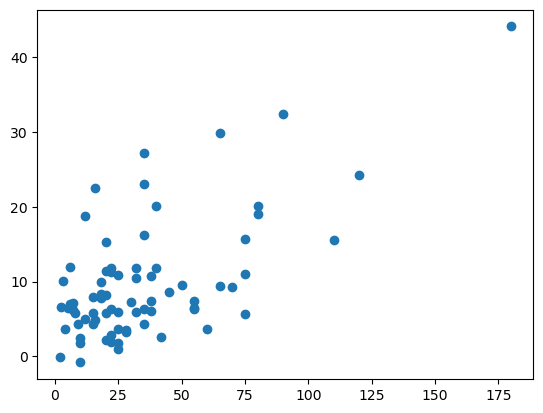

In [210]:
print(perf_joueur.sort_values(by = 'pts joueurs', ascending= False))
perf = perf_joueur['pts joueurs']
value = perf_joueur['valeur_joueur']


fig, ax = plt.subplots()
ax.scatter(value,perf)

plt.show()


                Joueur  Buts  Minutes  pts joueurs  pts_gagnes  valeur_joueur  \
76      Erling Haaland    36     2769    44.134865          83          180.0   
31       Callum Wilson    18     1850    22.489890          61           16.0   
194         Phil Foden    10     1554    15.518560          65          110.0   
144   Leandro Trossard     4     2738    27.158641          96           35.0   
91          Harry Kane    30     3405    32.360204          60           90.0   
204       Riyad Mahrez     5     1640    15.335375          59           20.0   
174      Mohamed Salah    19     3200    29.861172          64           65.0   
61          Diogo Jota     7     1051     9.503468          43           50.0   
13     Anthony Martial     6      953     7.974081          46           15.0   
136  Kelechi Iheanacho     4      996     8.324859          14           18.0   

     pts joueur par 90  
76            1.434503  
31            1.094103  
194           0.898758  
144     

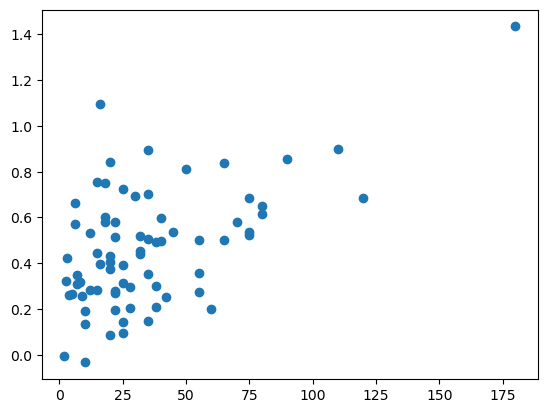

In [211]:
print(perf_joueur.sort_values(by = 'pts joueur par 90', ascending= False).head(10))
perf = perf_joueur['pts joueur par 90']
value = perf_joueur['valeur_joueur']


fig, ax = plt.subplots()
ax.scatter(value,perf)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                 Joueur  Minutes  valeur_joueur      Buts  Passes décisives_x  \
0       Aaron Cresswell     2235            1.2  0.000000            0.035714   
1          Aaron Hickey     1916           25.0  0.000000            0.038462   
2        Aaron Ramsdale     3420           40.0  0.000000            0.000000   
3     Aaron Wan-Bissaka     1435           25.0  0.000000            0.000000   
4    Abdoulaye Doucouré     1533           12.0  0.200000            0.080000   
..                  ...      ...            ...       ...                 ...   
499     Youri Tielemans     2344           25.0  0.096774            0.064516   
500       Yves Bissouma     1010           18.0  0.000000            0.000000   
501         Álex Moreno     1329           15.0  0.000000            0.157895   
502      Çağlar Söyüncü      529           15.0  0.142857            0.000000   
503      İlkay Gündoğan     2353           20.0  0.258065            0.129032   

     Shots on Target  Total

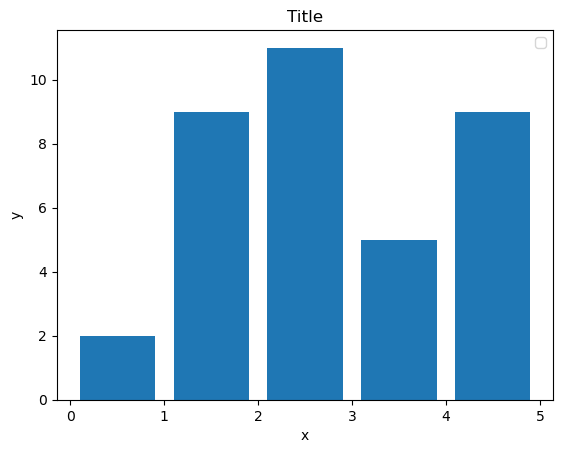

In [212]:

tt = base_work.groupby('Joueur').agg({'Minutes' : 'sum', 'valeur_joueur' : 'first', 'Buts' : 'mean',
                                    'Passes décisives_x' : 'mean', 'Shots on Target' : 'mean',
                                    'Total des tirs ' : 'mean', 'Passes progressives_x' : 'mean',}).reset_index()
print(tt)
tt_2 = tt[tt['Minutes']>1000]
List_valeur_joueur = tt_2['valeur_joueur']
bins = [0,1,2,3,4,5]

plt.hist(List_valeur_joueur, bins = bins, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.show()


#Ici compter plutôt le nombre de joueurs ayant + de 1000 minutes de jeu mais entre 1M € et 4€



In [214]:
tt_3 = base_work.groupby('Joueur').agg({'Minutes' : 'sum', 'valeur_joueur' : 'first', 'Buts' : 'sum',
                                    'Passes décisives_x' : 'sum', 'Shots on Target' : 'sum',
                                    'Total des tirs ' : 'sum', 'Passes progressives_x' : 'sum', 
                                    'position_aggregated' : 'first'}).reset_index()
tt_3_bis = tt_3[tt_3['position_aggregated']== 'Attaquant']

tt_4 = tt_3_bis[(tt_3_bis['Minutes']>1000) & (tt_3_bis['valeur_joueur'] <= 5) & (tt_3_bis['valeur_joueur'] >= 1)]
tt_4['pts joueurs'] =   tt_4[var_retenues[0]] * list_coef[0] + \
                                        tt_4[var_retenues[1]] * list_coef[1] + \
                                        tt_4[var_retenues[2]] * list_coef[2] + \
                                        tt_4[var_retenues[3]] * list_coef[3] + \
                                        tt_4[var_retenues[4]] * list_coef[4]
print(tt_4[['Joueur','pts joueurs']].sort_values(by = 'pts joueurs', ascending= False))
tt_4['pts joueur par 90'] = tt_4['pts joueurs'] * 90 / tt_4['Minutes']
Replacement_performance = tt_4['pts joueur par 90'].mean()
print(Replacement_performance)




            Joueur  pts joueurs
491        Willian    10.021072
219    Jamie Vardy     6.628114
247    Jordan Ayew     6.597227
278  Kieffer Moore     3.464285
126    Diego Costa    -0.088635
0.2403147436226012


/tmp/ipykernel_10616/1416378984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_4['pts joueurs'] =   tt_4[var_retenues[0]] * list_coef[0] + \
/tmp/ipykernel_10616/1416378984.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_4['pts joueur par 90'] = tt_4['pts joueurs'] * 90 / tt_4['Minutes']


In [216]:
perf_joueur['PAR_par_90'] = perf_joueur['pts joueur par 90'] - Replacement_performance
print(perf_joueur[['Joueur','PAR_par_90']].sort_values(by = 'PAR_par_90'))

               Joueur  PAR_par_90
179       Neal Maupay   -0.273831
60        Diego Costa   -0.244806
57       Demarai Gray   -0.152306
163     Matheus Cunha   -0.147096
3        Adama Traoré   -0.107524
..                ...         ...
91         Harry Kane    0.615021
144  Leandro Trossard    0.652409
194        Phil Foden    0.658444
31      Callum Wilson    0.853788
76     Erling Haaland    1.194188

[74 rows x 2 columns]


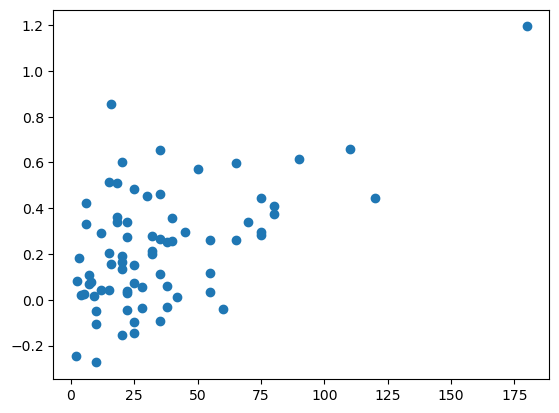

In [217]:
perf = perf_joueur['PAR_par_90']
value = perf_joueur['valeur_joueur']


fig, ax = plt.subplots()
ax.scatter(value,perf)

plt.show()